In [4]:
#Define local working drive
import os
#os.chdir("")

In [5]:
#import libraraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #data visualization
import matplotlib.style as style
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
%matplotlib inline
import sys

#supress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [6]:
#Load and prep data for K Means model induction
clean_city_data = pd.read_csv('data/clean_city_data.csv') #read in file from data prep

#Drop fields we don't expect to use in our K Means model
city_df_log = clean_city_data.drop(columns=['Rank', 'Name', 'county_name','city_state','state', 'pop_change', 'pop_change_per_year', 
                                    'est_pop_2011', 'est_pop_2012', 'est_pop_2013', 'est_pop_2014', 'est_pop_2015', 
                                    'est_pop_2016', 'est_pop_2017', 'est_pop_2018', 'est_pop_2019', 'City',
                                    'State_Code', '2018 total police force', 'total_employees',
                                    '2018 police officers', '2018 police civilians'])

#Fill in 0 with NaN
city_df_log = city_df_log.replace(0, np.nan)

#For Loop to log each of the numeric values in place then replace NaN values with 0.
for column in city_df_log.columns:
    try:
        city_df_log[column] = np.log10(city_df_log[column]).fillna(0)
    except (ValueError, AttributeError):
        pass


In [7]:
########### BUILD & TEST OPTIMAL K MEANS MODEL ###########
''' The purpose of this step is to determine the distortion and inertia of our K Means Model at a given for a given 
value of K. We repeat this step for the range K(1,10) and then compare using the Elbow Method to determine the optimal 
number of clusters for our model'''

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) #define the range of K values we would like to try
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(city_df_log) 
    kmeanModel.fit(city_df_log)     
      
    distortions.append(sum(np.min(cdist(city_df_log, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / city_df_log.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(city_df_log, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / city_df_log.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
#Reference: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [8]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 1.5404027987520084
2 : 1.21907275717562
3 : 1.1133853668301372
4 : 1.030198817209361
5 : 0.9769899303235409
6 : 0.9427639292549332
7 : 0.9104336610562622
8 : 0.8895988348914411
9 : 0.8625987281647327


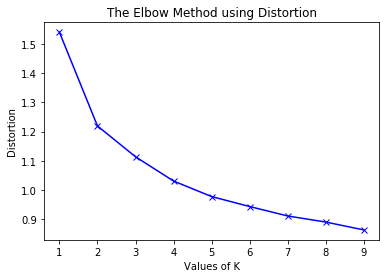

In [9]:
#Plot Elbow chart based on Intertia
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [10]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 684.1828444105927
2 : 335.5486384459199
3 : 276.6302434119103
4 : 237.79652956926867
5 : 214.9171815575549
6 : 198.68694784636222
7 : 185.34180720704862
8 : 174.3841878064395
9 : 166.77253118952657


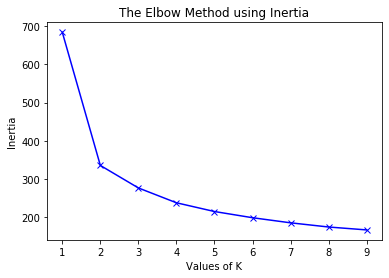

In [11]:
#Plot Elbow chart based on Intertia
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()